# Teste SpaceTime Labs

----

## Questão 1

In [1]:
def conta_ruas_lockdown(N, A, B):
    j=0
    for i in range(N+1)[1:]:
        j = (j+1) if any([i%A ==0,i%B == 0]) else j
    return j

In [2]:
print(conta_ruas_lockdown(10, 2, 3))
print(conta_ruas_lockdown(50, 5, 7))
print(conta_ruas_lockdown(1000000, 28, 32))

7
16
62500


------

## Questão 2

**Descrição do dataset**:

* bloco: identificador da região de plantação e colheita de cana de açúcar
* talhao: identificador da sub-região de plantação e colheita de cana de açúcar (um bloco contém vários
talhões)
* safra: ano que a cana de açúcar foi colhida
* area: tamanho da área colhida em hectares
* data_colheita: data em que a cana de açúcar foi colhida
* tch_bloco: Toneladas de Cana por Hectare colhida referente ao bloco
* NDVI_b01: NDVI (Normalized De Vegetation Index), e o “b01” corresponde ao índice médio relativo ao primeiro mês antes da colheita
* NDVI_bN: NDVI médio relativo ao N-ésimo mês antes da colheita

**Objetivo do projeto**: Desenvolver um modelo capaz de prever o TCH dos blocos do dataset para a safra de 2021.

## Importação dos dados

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.simplefilter("ignore")
pd.set_option('display.max_rows', 115)

In [4]:
df = pd.read_csv(r'/Users/leuzinger/Dropbox/Data Science/Case SpaceTime Labs/dataset_case_DS.csv')

In [5]:
df.head()

,Unnamed: 0,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,0,1239,1,2015,15.53,2015-10-25 00:00:00,75.88,0.622972,NaN,0.712402,0.693089,0.743105,0.805768,0.711357,0.767734,0.650449,NaN,0.241302,NaN
1,1,1243,1,2015,13.69,2015-07-14 00:00:00,65.22,0.677335,NaN,0.651432,NaN,0.721786,0.641068,NaN,0.337117,0.323262,0.289830,0.279747,0.262570
2,2,1243,2,2015,4.63,2015-07-15 00:00:00,65.22,0.632256,NaN,0.736531,0.560717,0.682829,0.582140,NaN,0.317600,0.298278,NaN,NaN,NaN
3,3,1243,7,2015,4.95,2015-07-16 00:00:00,65.22,0.570271,0.463221,0.702480,0.590163,0.664030,0.602534,NaN,0.386727,0.321662,NaN,NaN,NaN
4,4,1244,4,2015,8.66,2015-05-13 00:00:00,96.91,0.709576,0.454723,0.734945,0.722006,NaN,0.494456,0.401426,0.364672,0.367147,0.387163,0.452122,0.516717


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19870 entries, 0 to 19869
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     19870 non-null  int64  
 1   bloco          19870 non-null  int64  
 2   talhao         19870 non-null  int64  
 3   safra          19870 non-null  int64  
 4   area           16330 non-null  float64
 5   data_colheita  19755 non-null  object 
 6   tch_bloco      19838 non-null  float64
 7   NDVI_b01       18949 non-null  float64
 8   NDVI_b02       18829 non-null  float64
 9   NDVI_b03       18290 non-null  float64
 10  NDVI_b04       17487 non-null  float64
 11  NDVI_b05       16307 non-null  float64
 12  NDVI_b06       16422 non-null  float64
 13  NDVI_b07       16337 non-null  float64
 14  NDVI_b08       15798 non-null  float64
 15  NDVI_b09       15120 non-null  float64
 16  NDVI_b10       14647 non-null  float64
 17  NDVI_b11       13008 non-null  float64
 18  NDVI_b

In [7]:
df = df.drop('Unnamed: 0',axis=1)
df['data_colheita'] = pd.to_datetime(df['data_colheita'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19870 entries, 0 to 19869
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   bloco          19870 non-null  int64         
 1   talhao         19870 non-null  int64         
 2   safra          19870 non-null  int64         
 3   area           16330 non-null  float64       
 4   data_colheita  19755 non-null  datetime64[ns]
 5   tch_bloco      19838 non-null  float64       
 6   NDVI_b01       18949 non-null  float64       
 7   NDVI_b02       18829 non-null  float64       
 8   NDVI_b03       18290 non-null  float64       
 9   NDVI_b04       17487 non-null  float64       
 10  NDVI_b05       16307 non-null  float64       
 11  NDVI_b06       16422 non-null  float64       
 12  NDVI_b07       16337 non-null  float64       
 13  NDVI_b08       15798 non-null  float64       
 14  NDVI_b09       15120 non-null  float64       
 15  NDVI_b10       1464

In [8]:
df.head()

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,1239,1,2015,15.53,2015-10-25,75.88,0.622972,NaN,0.712402,0.693089,0.743105,0.805768,0.711357,0.767734,0.650449,NaN,0.241302,NaN
1,1243,1,2015,13.69,2015-07-14,65.22,0.677335,NaN,0.651432,NaN,0.721786,0.641068,NaN,0.337117,0.323262,0.289830,0.279747,0.262570
2,1243,2,2015,4.63,2015-07-15,65.22,0.632256,NaN,0.736531,0.560717,0.682829,0.582140,NaN,0.317600,0.298278,NaN,NaN,NaN
3,1243,7,2015,4.95,2015-07-16,65.22,0.570271,0.463221,0.702480,0.590163,0.664030,0.602534,NaN,0.386727,0.321662,NaN,NaN,NaN
4,1244,4,2015,8.66,2015-05-13,96.91,0.709576,0.454723,0.734945,0.722006,NaN,0.494456,0.401426,0.364672,0.367147,0.387163,0.452122,0.516717


------

## Limpeza dos dados

Antes de começar a análise do dataset, vamos limpar os dados.

In [9]:
df.isnull().sum()

bloco               0
talhao              0
safra               0
area             3540
data_colheita     115
tch_bloco          32
NDVI_b01          921
NDVI_b02         1041
NDVI_b03         1580
NDVI_b04         2383
NDVI_b05         3563
NDVI_b06         3448
NDVI_b07         3533
NDVI_b08         4072
NDVI_b09         4750
NDVI_b10         5223
NDVI_b11         6862
NDVI_b12         8242
dtype: int64

---

Verificamos que o dataset tem muitos valores em branco. Antes de decidir o que fazer com estes valores, é preciso examiná-los.

---

In [10]:
lista = df[(df.area.isnull()==True)]['bloco'].unique()
df[df.bloco.isin(lista)].sort_values(['bloco','talhao'])[:10]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
4643,1236,1,2016,6.43,2016-07-12,101.68,0.660357,0.712407,0.682959,NaN,0.378934,NaN,NaN,0.432385,0.589786,0.564760,NaN,NaN
8080,1236,1,2017,6.43,2017-07-23,86.43,0.359089,0.683225,0.570371,0.722969,0.792568,NaN,NaN,NaN,0.589414,0.467347,0.446032,0.297526
11419,1236,1,2018,6.22,2018-07-27,60.10,0.509706,0.553962,0.648584,0.738972,0.792210,0.780096,NaN,0.656676,0.438491,0.348275,0.286659,0.285387
14748,1236,1,2019,6.43,2019-07-12,69.18,0.641126,0.699486,0.750493,0.690155,0.746051,0.662154,0.673212,0.534159,0.342282,0.267040,0.257505,NaN
16445,1236,1,2020,NaN,2020-10-04,51.90,0.384249,NaN,0.479729,0.564533,0.629845,0.717385,0.729278,NaN,0.660739,NaN,0.460468,0.383685
3800,1236,2,2016,3.42,2016-07-06,101.68,0.628659,0.628896,0.617167,0.527482,0.611054,NaN,NaN,0.371698,0.383678,0.318137,NaN,NaN
7207,1236,2,2017,3.42,2017-11-10,86.43,0.423355,0.425829,0.460654,0.487857,0.530614,0.552597,0.587656,0.648282,NaN,0.549427,NaN,NaN
10616,1236,2,2018,3.42,2018-07-25,60.10,0.479539,0.412658,0.575260,0.624209,0.661809,0.597908,NaN,0.315461,NaN,NaN,NaN,NaN
13917,1236,2,2019,3.42,2019-07-11,69.18,0.555392,0.616084,0.650106,0.632419,0.631893,0.557860,0.563994,0.446160,0.328467,0.301652,0.289698,NaN
16446,1236,2,2020,NaN,2020-11-05,51.90,0.167690,0.357762,0.373363,0.407766,0.482634,0.481337,0.547575,0.539551,0.591749,0.538537,NaN,0.381633


In [11]:
lista = df[(df.data_colheita.isnull()==True)]['bloco'].unique()
df[df.bloco.isin(lista)].sort_values(['bloco','talhao'])[:10]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
3393,1318,1,2016,7.86,2016-10-24,46.46,0.541005,NaN,0.543375,0.624938,0.664672,0.619579,0.650427,0.587982,0.635573,NaN,NaN,NaN
10225,1318,1,2018,6.46,2018-07-08,139.39,0.667255,0.714403,0.753384,0.756028,0.673907,0.739257,0.581891,0.662200,0.611078,0.608620,0.677862,0.672090
13463,1318,1,2019,NaN,NaT,94.25,0.733818,0.742121,0.750504,0.709293,0.692059,NaN,0.504185,0.371439,0.320846,0.299756,NaN,NaN
16565,1318,1,2020,NaN,2020-10-22,84.50,0.408857,0.396095,0.472941,0.490616,0.529498,0.558046,0.633011,0.707958,NaN,0.671246,NaN,0.448816
3819,1318,2,2016,2.51,2016-10-22,46.46,0.538544,NaN,0.588504,0.621241,0.671270,0.608038,0.652931,0.641752,0.399441,NaN,NaN,NaN
12202,1318,2,2018,7.81,2018-07-08,139.39,0.696029,0.733771,0.766465,0.766945,0.662892,0.757443,0.523213,0.649017,0.603544,0.616227,0.680219,0.667862
15630,1318,2,2019,NaN,NaT,94.25,0.712241,0.745143,0.734060,0.681058,0.668439,NaN,0.511120,0.361319,0.314161,0.285863,NaN,NaN
16566,1318,2,2020,NaN,2020-10-18,84.50,0.409168,0.398943,0.473986,0.536752,0.517132,0.655842,0.694097,0.741326,NaN,0.684743,NaN,0.471911
5891,1318,3,2016,4.03,2016-10-24,46.46,0.520981,NaN,0.542252,0.590789,0.663539,0.579616,0.657354,0.563013,0.426595,NaN,NaN,NaN
10226,1318,3,2018,5.30,2018-07-09,139.39,0.682254,0.724838,0.766900,0.774900,0.668060,0.750179,0.496373,0.604408,0.532426,0.561839,0.633349,0.619208


In [12]:
lista = df[(df.tch_bloco.isnull()==True)]['bloco'].unique()
df[df.bloco.isin(lista)].sort_values(['bloco','talhao'])[:10]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
1515,1357,1,2015,8.64,2015-06-12,104.28,0.560011,0.723784,NaN,0.753860,0.739095,0.574669,0.465178,0.442331,0.425564,0.509961,0.473171,0.465006
4660,1357,1,2016,8.92,2016-07-25,80.75,0.645183,0.689671,0.671252,0.711323,NaN,0.521723,NaN,NaN,NaN,0.459200,0.401939,0.328257
8108,1357,1,2017,8.92,2017-09-17,61.97,0.561801,0.605856,0.715280,0.694626,0.645020,0.714974,0.676409,0.754707,0.594936,0.512324,0.476257,0.339432
14771,1357,1,2019,NaN,NaT,NaN,NaN,0.448475,NaN,0.734450,NaN,0.663825,0.395827,0.371531,0.377227,0.457353,0.474648,0.508572
16646,1357,1,2020,NaN,2020-08-23,92.70,0.534981,0.629003,0.694800,0.778286,0.765914,0.787156,0.662749,NaN,NaN,0.501623,0.468881,0.499989
27,1357,2,2015,12.53,2015-06-12,104.28,0.606405,0.730581,NaN,0.770099,0.759300,0.537352,0.494894,0.480092,0.470438,0.540441,0.510380,0.500675
2950,1357,2,2016,13.89,2016-07-23,80.75,0.669249,0.708285,0.694450,0.728916,NaN,0.530665,NaN,NaN,NaN,0.482191,0.422526,0.351897
6310,1357,2,2017,13.89,2017-09-17,61.97,0.600781,0.637149,0.733459,0.698046,0.657977,0.737303,0.705674,0.764149,0.597411,0.527565,0.492013,0.366543
13068,1357,2,2019,NaN,NaT,NaN,NaN,0.507056,NaN,0.750507,NaN,0.679439,0.421968,0.407366,0.409763,0.478562,0.497599,0.529751
16647,1357,2,2020,NaN,2020-08-24,92.70,0.569449,0.650422,0.708424,0.780500,0.763065,0.792830,0.709250,NaN,NaN,0.556282,0.494241,0.511743


-------

Para o caso da data da colheita e do TCH do bloco, vemos que há poucas linhas do dataset que estão sem valor. Nestes casos, é melhor remover estas linhas do dataset. **Vamos considerar que este tipo de linha é um erro no dataset, pois não são significativos para nossa análise e representam apenas 0,6% dos dados**.

---

In [13]:
df = df.dropna(subset=['data_colheita','tch_bloco']).reset_index(drop=True)
df.isnull().sum()

bloco               0
talhao              0
safra               0
area             3425
data_colheita       0
tch_bloco           0
NDVI_b01          897
NDVI_b02         1024
NDVI_b03         1554
NDVI_b04         2366
NDVI_b05         3558
NDVI_b06         3431
NDVI_b07         3532
NDVI_b08         4069
NDVI_b09         4730
NDVI_b10         5190
NDVI_b11         6814
NDVI_b12         8184
dtype: int64

In [14]:
df[(df.area.isnull()==True)]['safra'].unique()

array([2020])

In [15]:
df[(df.safra==2020)]['area'].unique()

array([nan])

---

Após excluir as linhas, verificamos que todos os valores em branco referentes à variável 'área' são da safra de 2020. E o mais importante é que não temos nenhum valor de área para a safra de 2020. **O problema é que sem a área do talhão, não é possível estabelecer uma relação entre os valores que estão definidos no nível do talhão (área, data da colheita e NDVI) e o valor do TCH que está no nível do bloco**.

Se a área colhida fosse sempre a mesma em cada talhão ou em cada bloco, bastaria adotar esse valor. Contudo, não é esse o caso. Uma possível solução é utilizar imputações estatítisticas ou do tipo [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) para estimar esse dado de área faltante. 

Logo, procederemos da seguinte forma:

1. imputaremos os valores de área mais frequentes para os talhoes que tiveram safras anteriores.
2. imputaremos a área média dos talhões do bloco para os talhões que não tiveram safras anteriores, mas fazem parte de um bloco.
3. imputaremos as áreas que ainda estiverem faltando usando o KNN imputer.

Além diso, antes da terceira imputação, criaremos a coluna n_talhao, que indica quantos talhões existem no bloco, para tentar melhorar o algoritmo.

Quanto aos valores em branco de NDVI, vamos usar também o KNN imputer para completar os dados, pois os modelos de ML não funcionarão caso estes valores estejam em branco.

----- 

In [16]:
from sklearn.impute import SimpleImputer
dfi = df.copy()
imputer = SimpleImputer(strategy = 'most_frequent')
imputer2 = SimpleImputer(strategy = 'mean')
for i in dfi['bloco'].sort_values().unique():
    for j in df[df['bloco']==i]['talhao'].sort_values().unique():
        #print(i,j)
        if ((len(dfi[(dfi['bloco']==i)&(dfi['talhao']==j)]['area'])>1) &
            (np.isnan(dfi.iloc[dfi[(dfi['bloco']==i)&(dfi['talhao']==j)]['area'][-1:].index[0],3]))
           ):
            dfi.iloc[dfi[(dfi['bloco']==i)&(dfi['talhao']==j)]['area'][-1:].index[0],3] = imputer.fit_transform(dfi[(dfi['bloco']==i)&(dfi['talhao']==j)]['area'].to_frame())[-1,0]
    
    if ((dfi[(dfi['bloco']==i)&(dfi['safra']==2020)]['area'].isnull().sum()!=0) &
        (len(dfi[(dfi['bloco']==i)&(dfi['safra']==2020)]['area'])>1) &
        (dfi[(dfi['bloco']==i)&(dfi['safra']==2020)]['area'].sum()!=0)
       ):
        for k in range(len(dfi[(dfi['bloco']==i)&(dfi['safra']==2020)]['area'])):
            dfi.iloc[dfi[(dfi['bloco']==i)&(dfi['safra']==2020)]['area'].index[k],3] = imputer2.fit_transform(dfi[(dfi['bloco']==i)]['area'].to_frame())[k,0]

In [17]:
dfi.isnull().sum()

bloco               0
talhao              0
safra               0
area              429
data_colheita       0
tch_bloco           0
NDVI_b01          897
NDVI_b02         1024
NDVI_b03         1554
NDVI_b04         2366
NDVI_b05         3558
NDVI_b06         3431
NDVI_b07         3532
NDVI_b08         4069
NDVI_b09         4730
NDVI_b10         5190
NDVI_b11         6814
NDVI_b12         8184
dtype: int64

In [18]:
dfi['n_talhao'] = dfi['talhao']
a = dfi.groupby(['bloco','safra']).count()['talhao'].reset_index()
for i in dfi['bloco'].sort_values().unique():
    for j in df[df['bloco']==i]['safra'].sort_values().unique():
        for k in range(len(dfi[(dfi['bloco']==i)&(dfi['safra']==j)]['n_talhao'])):
            dfi.iloc[dfi[(dfi['bloco']==i)&(dfi['safra']==j)]['n_talhao'].index[k],-1] = a.iloc[a[(a['bloco']==i)&(a['safra']==j)].index[0],2]

In [19]:
from sklearn.impute import KNNImputer

dfii = dfi[['safra','area','tch_bloco','n_talhao']]

imputer = KNNImputer()
dfii = pd.DataFrame(imputer.fit_transform(dfii),columns = dfii.columns)
dfi['area'] = dfii['area']

In [20]:
dfi.isnull().sum()

bloco               0
talhao              0
safra               0
area                0
data_colheita       0
tch_bloco           0
NDVI_b01          897
NDVI_b02         1024
NDVI_b03         1554
NDVI_b04         2366
NDVI_b05         3558
NDVI_b06         3431
NDVI_b07         3532
NDVI_b08         4069
NDVI_b09         4730
NDVI_b10         5190
NDVI_b11         6814
NDVI_b12         8184
n_talhao            0
dtype: int64

In [21]:
dfii = dfi[['safra','area','data_colheita','tch_bloco','NDVI_b01', 'NDVI_b02', 'NDVI_b03', 'NDVI_b04', 'NDVI_b05', 'NDVI_b06',
       'NDVI_b07', 'NDVI_b08', 'NDVI_b09', 'NDVI_b10', 'NDVI_b11', 'NDVI_b12']]
dfii['data_colheita'] = dfii['data_colheita'].dt.month

imputer = KNNImputer()
dfii = pd.DataFrame(imputer.fit_transform(dfii),columns = dfii.columns)

dfi[['NDVI_b01','NDVI_b02','NDVI_b03','NDVI_b04','NDVI_b05','NDVI_b06','NDVI_b07','NDVI_b08','NDVI_b09',
     'NDVI_b10','NDVI_b11','NDVI_b12']] = dfii[['NDVI_b01','NDVI_b02','NDVI_b03','NDVI_b04','NDVI_b05',
                                                 'NDVI_b06','NDVI_b07','NDVI_b08','NDVI_b09','NDVI_b10',
                                                 'NDVI_b11','NDVI_b12']]

In [22]:
dfi.isnull().sum()

bloco            0
talhao           0
safra            0
area             0
data_colheita    0
tch_bloco        0
NDVI_b01         0
NDVI_b02         0
NDVI_b03         0
NDVI_b04         0
NDVI_b05         0
NDVI_b06         0
NDVI_b07         0
NDVI_b08         0
NDVI_b09         0
NDVI_b10         0
NDVI_b11         0
NDVI_b12         0
n_talhao         0
dtype: int64

In [23]:
df.describe()[['area','NDVI_b01', 'NDVI_b02', 'NDVI_b03', 'NDVI_b04', 'NDVI_b05', 'NDVI_b06',
       'NDVI_b07', 'NDVI_b08', 'NDVI_b09', 'NDVI_b10', 'NDVI_b11', 'NDVI_b12']]

,area,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
count,16330.000000,18858.000000,18731.000000,18201.000000,17389.000000,16197.000000,16324.000000,16223.000000,15686.000000,15025.000000,14565.000000,12941.000000,11571.000000
mean,10.315681,0.555198,0.584408,0.616019,0.641219,0.660380,0.649698,0.625652,0.574281,0.521855,0.475510,0.437605,0.421976
std,7.014490,0.116653,0.119236,0.111679,0.099086,0.093609,0.109039,0.123799,0.136323,0.136549,0.126454,0.112685,0.107293
min,0.100000,0.167690,0.144434,0.252998,0.238391,0.194337,0.193197,0.164646,0.153519,0.175709,0.168284,0.087098,0.016624
25%,4.980000,0.466742,0.492269,0.531234,0.570376,0.606408,0.591299,0.539239,0.462159,0.407593,0.372263,0.349010,0.339028
50%,8.940000,0.544128,0.585129,0.623090,0.652993,0.677149,0.677435,0.660488,0.585325,0.513960,0.458715,0.416971,0.400721
75%,14.150000,0.649843,0.685274,0.711634,0.721150,0.729874,0.730545,0.722528,0.691985,0.637376,0.571464,0.513400,0.494742
max,55.330000,0.827770,0.847112,0.843789,0.848073,0.840200,0.864477,0.864479,0.873298,0.863752,0.822103,0.807408,0.793348


In [24]:
dfi.describe()[['area','NDVI_b01', 'NDVI_b02', 'NDVI_b03', 'NDVI_b04', 'NDVI_b05', 'NDVI_b06',
       'NDVI_b07', 'NDVI_b08', 'NDVI_b09', 'NDVI_b10', 'NDVI_b11', 'NDVI_b12']]

,area,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
count,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000
mean,10.347039,0.554465,0.586974,0.618711,0.644996,0.657405,0.646210,0.625638,0.578792,0.532422,0.481837,0.434496,0.409794
std,6.951789,0.116091,0.118286,0.110083,0.095916,0.090768,0.105794,0.117962,0.129057,0.129340,0.120395,0.101027,0.092207
min,0.100000,0.167690,0.144434,0.252998,0.238391,0.194337,0.193197,0.164646,0.153519,0.175709,0.168284,0.087098,0.016624
25%,5.050000,0.465436,0.495208,0.535895,0.579041,0.604324,0.588632,0.547703,0.477719,0.426183,0.382788,0.358429,0.344557
50%,9.010000,0.543233,0.589661,0.628132,0.658793,0.672151,0.670628,0.656294,0.594255,0.535359,0.471934,0.417920,0.389449
75%,14.160000,0.648263,0.687025,0.711854,0.720391,0.724530,0.724974,0.716223,0.684227,0.637570,0.574345,0.498332,0.459478
max,55.330000,0.827770,0.847112,0.843789,0.848073,0.840200,0.864477,0.864479,0.873298,0.863752,0.822103,0.807408,0.793348


In [25]:
df = dfi

----

**Verificamos que para nenhuma das variáveis as imputações mudaram significativamente as estatísticas do dataset, o que indica que as imputações estão coerentes**.

------

## Análise exploratória

Para iniciar a análise exploratória, vamos olhar para algumas estatísticas dos dados.

In [26]:
df.describe()

,bloco,talhao,safra,area,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,n_talhao
count,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000,19755.000000
mean,2742.280992,4.647127,2017.551253,10.347039,76.365356,0.554465,0.586974,0.618711,0.644996,0.657405,0.646210,0.625638,0.578792,0.532422,0.481837,0.434496,0.409794,8.011794
std,1092.827862,3.989844,1.687594,6.951789,25.924591,0.116091,0.118286,0.110083,0.095916,0.090768,0.105794,0.117962,0.129057,0.129340,0.120395,0.101027,0.092207,5.382119
min,1236.000000,1.000000,2015.000000,0.100000,11.850000,0.167690,0.144434,0.252998,0.238391,0.194337,0.193197,0.164646,0.153519,0.175709,0.168284,0.087098,0.016624,1.000000
25%,1755.000000,2.000000,2016.000000,5.050000,58.220000,0.465436,0.495208,0.535895,0.579041,0.604324,0.588632,0.547703,0.477719,0.426183,0.382788,0.358429,0.344557,4.000000
50%,2476.000000,4.000000,2018.000000,9.010000,73.780000,0.543233,0.589661,0.628132,0.658793,0.672151,0.670628,0.656294,0.594255,0.535359,0.471934,0.417920,0.389449,7.000000
75%,3566.000000,6.000000,2019.000000,14.160000,92.370000,0.648263,0.687025,0.711854,0.720391,0.724530,0.724974,0.716223,0.684227,0.637570,0.574345,0.498332,0.459478,10.000000
max,4739.000000,43.000000,2020.000000,55.330000,209.000000,0.827770,0.847112,0.843789,0.848073,0.840200,0.864477,0.864479,0.873298,0.863752,0.822103,0.807408,0.793348,43.000000


In [27]:
df[df.tch_bloco==209]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,n_talhao
8906,1262,1,2017,16.55,2017-06-12,209.0,0.664877,0.612798,0.740474,0.757381,0.741256,0.698879,0.682517,0.694812,0.584175,0.420449,0.431393,0.387501,1


In [28]:
df[df.area == 55.33]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,n_talhao
153,1855,1,2015,55.33,2015-05-17,73.00,0.700968,0.558646,0.751636,0.725965,0.743985,0.519890,0.470911,0.401140,0.347762,0.282058,0.452577,0.372404,10
3087,1855,1,2016,55.33,2016-05-28,98.60,0.610096,0.674148,0.636590,0.710581,0.647671,0.677744,0.427150,0.501169,0.388511,0.397166,0.386068,0.360098,10
6332,1855,1,2017,55.33,2017-05-03,78.43,0.641381,0.626435,0.704116,0.739978,0.664973,0.631464,0.439578,0.342379,0.377609,0.351048,0.493573,0.401042,10
9936,1855,1,2018,55.33,2018-06-03,57.85,0.603086,0.699989,0.733644,0.709773,0.593656,0.535436,0.376446,0.414752,0.404651,0.397850,0.373459,0.368451,10
13159,1855,1,2019,55.33,2019-04-21,29.19,0.656032,0.690719,0.523535,0.323558,0.516827,0.330419,0.314009,0.303374,0.306151,0.312281,0.360287,0.419386,10


----

Vemos que o TCH médio de um talhao é de 15.1 ton/ha, mas varia bastante, de 0.03 a 209 ton/ha. Contudo, visto que o valor do percentil 75% é 18.29 ton/ha e o desvio padrão é de 25.9, este valor de 209 ton/ha certamente está muito fora do que pode ser considerado normal.

Em termos das áreas, temos também alguns valores extremos, como um talhao de apenas 0.1 ha e outro com 55.33 ha, valores muito além dos percentis 25% e 75%.

Seguimos nossa análise com um alguns gráficos.

----

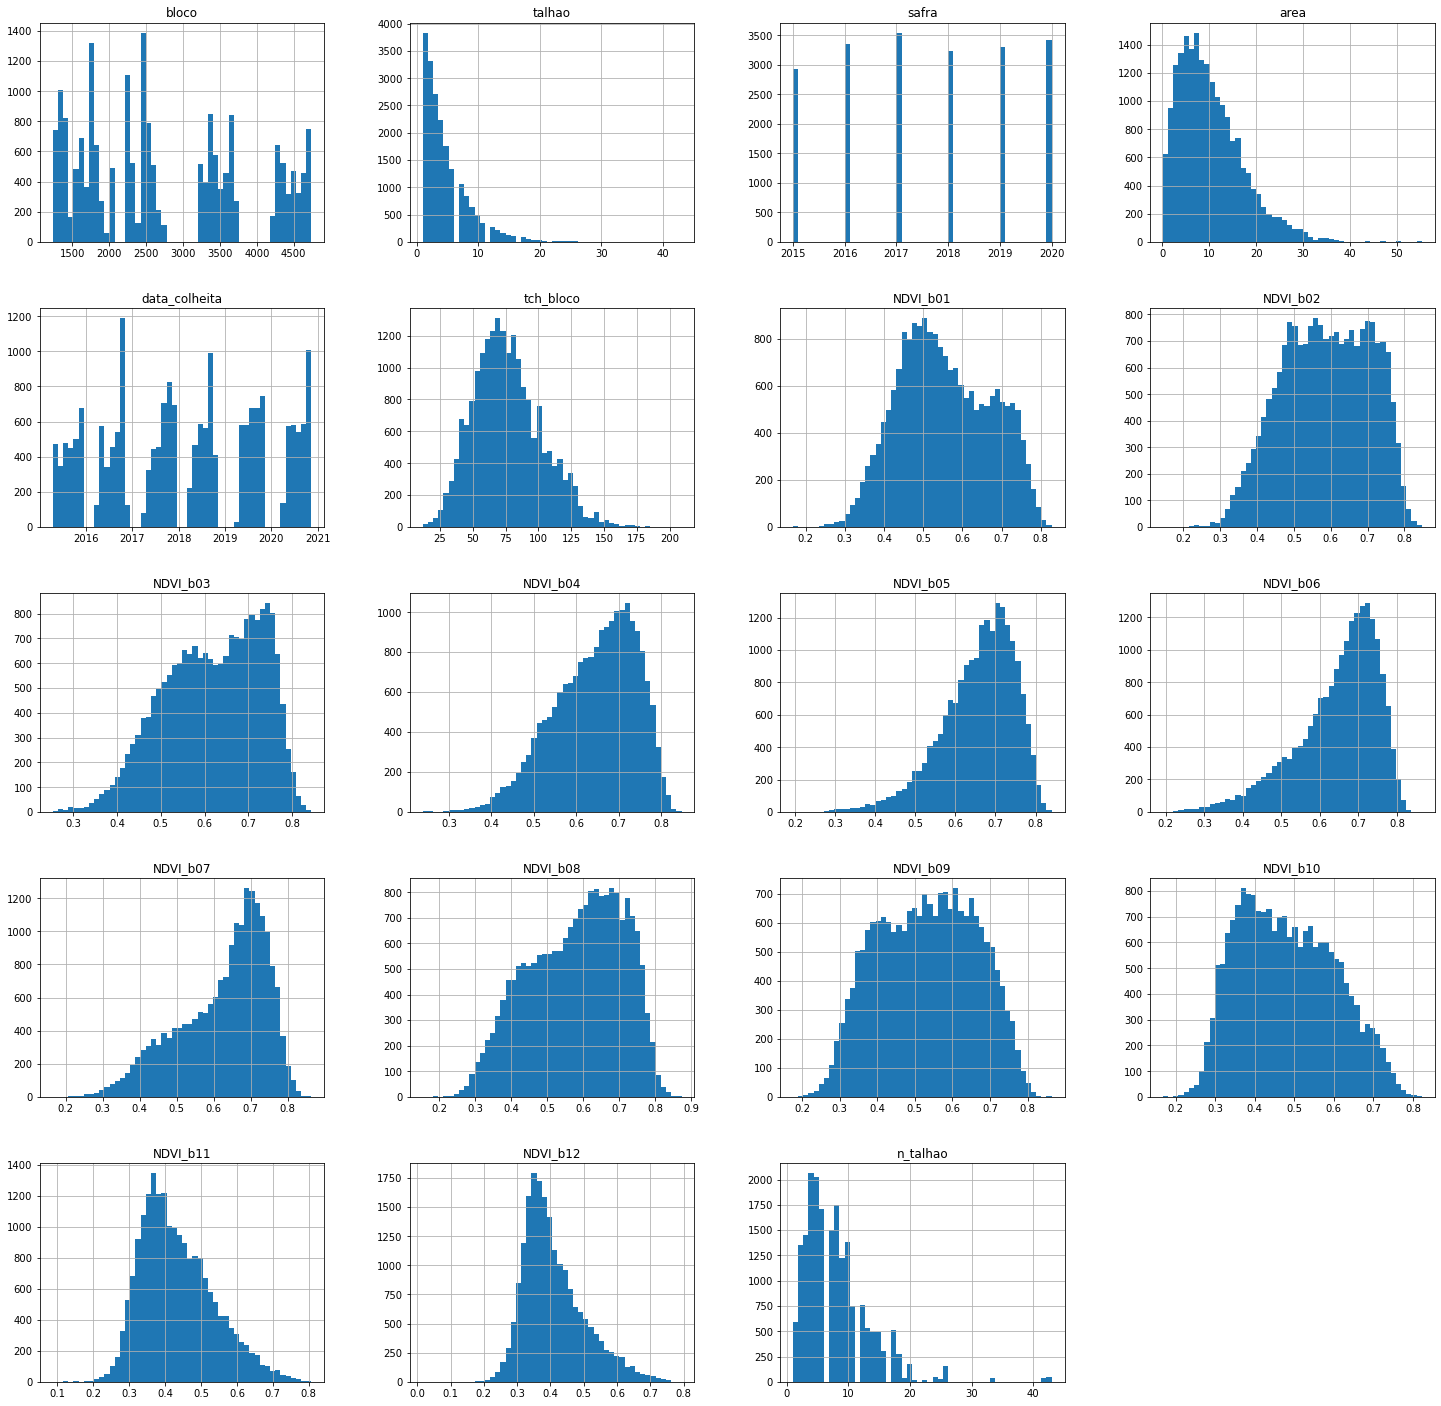

In [29]:
df.hist(bins=50,figsize=(25, 25))

plt.show()

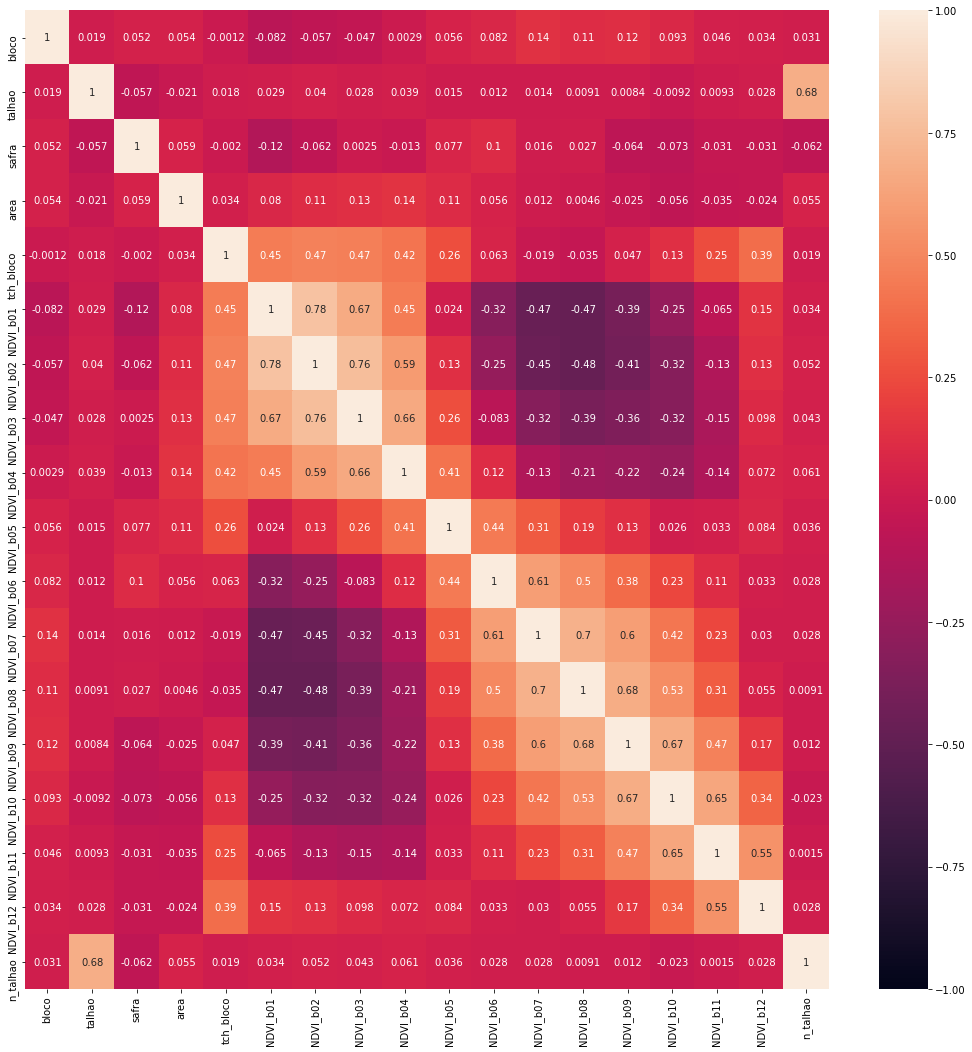

In [30]:
plt.figure(figsize=(18, 18))
sns.heatmap(data=df.corr(),annot=True,vmin=-1)
sns.set_context("notebook", font_scale=1)
plt.show()

----

Primeiro, plotamos histogramas das variáveis. Vemos que nenhuma das variáveis apresenta distribuição normal. Todas possuem algum grau de assimetria para a direita ou esquerda.

Em seguida, plotamos um gráfico de calor das correlações entre as variáveis. Os valores que chamam atenção são a correlação positiva entre NDVI de um mês e o NDVI do mês anterior e a correlação negativa entre o NVDI de um mês e o NVDI de 8 meses antes.

---

----

## Alternativas para a construção do modelo

As linhas do dataset apresentam a data da colheita e a área referente ao talhão, mas o TCH referente ao bloco. Aqui podemos testar ao menos três alternativas para estimar o TCH dos blocos em 2020:

1. Otimizar o modelo para estimar o TCH de cada talhão e assumir que o TCH do bloco é a soma dos TCHs de seus talhões, assumindo ainda que o TCH de cada talhão é proporcional a sua área.
2. Otimizar o modelo para estimar diretamente o TCH dos blocos, assumindo que a área do bloco é a soma da área de seus talhões e que os NDVIs do bloco são a média dos NDVIs de seus talhões.
3. Otimizar o modelo para estimar diretamente o TCH do bloco usando os dados de seus talhões.

Vamos explorar cada uma dessas alternativas de modo breve e, depois, trabalhar mais na alternativa que apresentar os melhores resultados iniciais.

---

## Alternativa 1

Objetivo da alternativa: otimizar o modelo para estimar o TCH de cada talhão e assumir que o TCH do bloco é a soma dos TCHs de seus talhões, assumindo ainda que o TCH de cada talhão é proporcional a sua área.

---

### Divisão em dados de treino e de teste

Como a temporalidade importa no nosso projeto, vamos dividir o dataset em dados de treino e de teste levando isso em consideração. Logo, usaremos os dados da safra de 2020 como dados de teste e os dados das demais safras como dados de treino.

Além disso, vamos dividir nossas variáveis (dependentes e independentes), tendo como alvo (variável dependente) o tch_bloco, ou seja, o TCH de cada bloco.

In [31]:
treino_1 = df[df['safra']<2020]
teste_1 = df[df['safra']==2020]

---

### Preparação dos dados para utilização no modelo

Antes de começar a treinar o modelo, é preciso fazer alguns ajustes no dataset.

Vamos estimar o TCH de cada talhão com base em sua área. Para isso, vamos dividir o TCH de cada bloco entre os seus talhões, usando como referência a área de cada talhão e assumindo que o TCH é diretamente proporcional à área.

Além disso, visto que os modelos não funcionam bem com dados do tipo 'datetime', vamos transformar a data em duas variáveis: mês e dia. O ano não é necessário pois esta informação já está indicada na variável safra.

In [32]:
area_bloco = df.groupby(['bloco','safra']).sum()['area'].to_frame().reset_index()
treino_1['tch_talhao'] = np.nan
for i in range(len(treino_1)):
    treino_1.loc[i,'tch_talhao'] = treino_1.loc[i,'tch_bloco']*treino_1.loc[i,'area']/area_bloco[(area_bloco.bloco == treino_1.loc[i,'bloco'])&(area_bloco.safra == treino_1.loc[i,'safra'])]['area'].sum()

treino_1 = treino_1.sort_values(['bloco','talhao']).reset_index(drop=True)
X_treino_1 = treino_1.drop(['tch_bloco','tch_talhao'],axis=1)
y_treino_1 = treino_1[['tch_bloco','tch_talhao']]

teste_1 = teste_1.sort_values(['bloco','talhao']).reset_index(drop=True)
X_teste_1 = teste_1.drop(['tch_bloco'],axis=1)
y_teste_1 = teste_1[['tch_bloco']]

In [33]:
X_treino_prep_1 = X_treino_1.copy()
X_treino_prep_1['mês'] = X_treino_prep_1['data_colheita'].dt.month
X_treino_prep_1['dia'] = X_treino_prep_1['data_colheita'].dt.day
X_treino_prep_1 = X_treino_prep_1.drop(['data_colheita'],axis=1)
X_treino_prep_1.head()

,bloco,talhao,safra,area,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,n_talhao,mês,dia
0,1236,1,2016,6.43,0.660357,0.712407,0.682959,0.600387,0.378934,0.682503,0.541030,0.432385,0.589786,0.564760,0.485607,0.512599,2,7,12
1,1236,1,2017,6.43,0.359089,0.683225,0.570371,0.722969,0.792568,0.618413,0.635761,0.489943,0.589414,0.467347,0.446032,0.297526,2,7,23
2,1236,1,2018,6.22,0.509706,0.553962,0.648584,0.738972,0.792210,0.780096,0.625931,0.656676,0.438491,0.348275,0.286659,0.285387,2,7,27
3,1236,1,2019,6.43,0.641126,0.699486,0.750493,0.690155,0.746051,0.662154,0.673212,0.534159,0.342282,0.267040,0.257505,0.384877,2,7,12
4,1236,2,2016,3.42,0.628659,0.628896,0.617167,0.527482,0.611054,0.698258,0.533087,0.371698,0.383678,0.318137,0.470215,0.509764,2,7,6


----

### Teste dos modelos

Primeiro, vamos construir um Pipeline para normalizar os dados. Visto que algumas das variáveis tem escalas bem distintas, normalizar os dados pode (ou não) fazer o modelo performar melhor.

Em seguida, vamos montar uma função para calcular os erros dos modelos. Os modelos serão avaliados com base em três métricas:

1. MAE - erro médio absoluto
2. RMSE - raiz do erro quadrático médio
3. R2

Usaremos o MAE porque ele retorna o erro na mesma ordem de grandeza dos dados, o que nos permite avaliar os modelos de maneira intuitiva. Contudo, como o MAE penaliza todos os erros igualmente, usaremos também o RMSE, que penaliza os erros grande mais do que os pequenos e também fornece os valores de erro na mesma unidade dos dados. Por fim, usaremos o r2 porque ele é mais intuitivo para comparar modelos, visto que os valores ficam sempre entre 0 e 1. Logo, é mais fácil entender o 'quanto' um modelo é melhor (ou pior) do que os outros usando o r2.

Definimos um valor de random state (rs) para garantir que todos os modelos e todas as alternativas serão testados no mesmo conjunto de dados. Contudo, para manter a aletaoridade dos testes, definimos este valor de forma aleatória. Além disso, o valor do random state é apresentado para permitir também que o notebook seja replicado de maneira idêntica por outras pessoas.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def estimator_scaler(estimator):
    scaler = StandardScaler()
    pipeline = Pipeline(steps=[('s',scaler),('m', estimator)])
    return pipeline 

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

def estimator_cross_val (model,estimator,matriz,rs,X,y,pipe='None'):
    if pipe != 'None':
        pipe_ = pipe(estimator)
    else:
        pipe_ = estimator
        
    scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error','r2']
    kfold = KFold(n_splits=5, random_state=rs,shuffle=True)
    scores = cross_validate(pipe_,X,y,cv=kfold,scoring=scoring)
    
    mae_scores = -scores.get('test_neg_mean_absolute_error')
    mae_mean = mae_scores.mean()
    mae_std = mae_scores.std()
    
    rmse_scores = -scores.get('test_neg_root_mean_squared_error')
    rmse_mean = rmse_scores.mean()
    rmse_std = rmse_scores.std()
    
    r2_scores = scores.get('test_r2')
    r2_mean = r2_scores.mean()
    r2_std = r2_scores.std()
    
    results_ = [model,mae_mean,mae_std,rmse_mean,rmse_std,r2_mean,r2_std]
    results_ = pd.Series(results_, index = matriz.columns)
    results = matriz.append(results_,ignore_index=True)
    return results

In [36]:
from random import randrange
rs = randrange(10000)
rs

7870

----

Vamos testar alguns modelos de regressão para ver qual tem a melhor performance. Os modelos testados serão:

1. Regressão Linear
2. Regressão Ridge
3. Regressão Lasso
4. Elastic Net
5. KNN
6. Árvore de Decisão

Testaremos também alguns modelos de ensemble:

1. AdaBoost
2. Random Forest
3. XGBoost

----

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

matriz_11 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz_11 = estimator_cross_val('Linear Regression',LinearRegression(),      matriz_11,rs,X_treino_prep_1,y_treino_1['tch_talhao'])
matriz_11 = estimator_cross_val('Ridge Regression', Ridge(),                 matriz_11,rs,X_treino_prep_1,y_treino_1['tch_talhao'])
matriz_11 = estimator_cross_val('Lasso',            Lasso(),                 matriz_11,rs,X_treino_prep_1,y_treino_1['tch_talhao'])
matriz_11 = estimator_cross_val('Elastic Net',      ElasticNet(),            matriz_11,rs,X_treino_prep_1,y_treino_1['tch_talhao'])
matriz_11 = estimator_cross_val('KNN',              KNeighborsRegressor(),   matriz_11,rs,X_treino_prep_1,y_treino_1['tch_talhao'])
matriz_11 = estimator_cross_val('CART',             DecisionTreeRegressor(), matriz_11,rs,X_treino_prep_1,y_treino_1['tch_talhao'])
matriz_11

,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,Linear Regression,8.520874,0.198921,14.254067,0.587790,0.339455,0.019118
1,Ridge Regression,8.519437,0.198507,14.253911,0.587584,0.339469,0.019103
2,Lasso,8.775726,0.140882,14.774732,0.556972,0.290249,0.015672
3,Elastic Net,8.752955,0.141393,14.758852,0.556667,0.291772,0.015786
4,KNN,6.224550,0.121105,12.932596,0.521985,0.456040,0.021234
5,CART,5.794149,0.082476,11.170295,0.135740,0.593382,0.020677


In [38]:
matriz_12 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz_12 = estimator_cross_val('Linear Regression',LinearRegression(),      matriz_12,rs,X_treino_prep_1,y_treino_1['tch_talhao'],estimator_scaler)
matriz_12 = estimator_cross_val('Ridge Regression', Ridge(),                 matriz_12,rs,X_treino_prep_1,y_treino_1['tch_talhao'],estimator_scaler)
matriz_12 = estimator_cross_val('Lasso',            Lasso(),                 matriz_12,rs,X_treino_prep_1,y_treino_1['tch_talhao'],estimator_scaler)
matriz_12 = estimator_cross_val('Elastic Net',      ElasticNet(),            matriz_12,rs,X_treino_prep_1,y_treino_1['tch_talhao'],estimator_scaler)
matriz_12 = estimator_cross_val('KNN',              KNeighborsRegressor(),   matriz_12,rs,X_treino_prep_1,y_treino_1['tch_talhao'],estimator_scaler)
matriz_12 = estimator_cross_val('CART',             DecisionTreeRegressor(), matriz_12,rs,X_treino_prep_1,y_treino_1['tch_talhao'],estimator_scaler)
matriz_12

,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,Linear Regression,8.520874,0.198921,14.254067,0.587790,0.339455,0.019118
1,Ridge Regression,8.520768,0.198910,14.254064,0.587776,0.339455,0.019117
2,Lasso,8.517493,0.135201,14.509469,0.544213,0.315506,0.014691
3,Elastic Net,8.682455,0.125584,14.797284,0.527407,0.288034,0.012903
4,KNN,7.021182,0.182016,13.702401,0.597778,0.389486,0.024572
5,CART,5.821181,0.133335,11.166870,0.308182,0.593505,0.027290


In [39]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

matriz_13 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz_13 = estimator_cross_val('AdaBoost',      AdaBoostRegressor(),                    matriz_13,rs,X_treino_prep_1,y_treino_1['tch_talhao'])
matriz_13 = estimator_cross_val('Random Forest', RandomForestRegressor(random_state=rs), matriz_13,rs,X_treino_prep_1,y_treino_1['tch_talhao'])
matriz_13 = estimator_cross_val('XGBoost',       XGBRegressor(random_state=rs),          matriz_13,rs,X_treino_prep_1,y_treino_1['tch_talhao'])
matriz_13

,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,AdaBoost,15.049277,0.950010,16.738581,0.914627,0.087363,0.079120
1,Random Forest,4.172732,0.070786,7.830903,0.241285,0.800165,0.012818
2,XGBoost,4.190609,0.083248,7.790350,0.305717,0.802266,0.013914


In [40]:
matriz_14 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz_14 = estimator_cross_val('AdaBoost',      AdaBoostRegressor(),                    matriz_14,rs,X_treino_prep_1,y_treino_1['tch_talhao'],estimator_scaler)
matriz_14 = estimator_cross_val('Random Forest', RandomForestRegressor(random_state=rs), matriz_14,rs,X_treino_prep_1,y_treino_1['tch_talhao'],estimator_scaler)
matriz_14 = estimator_cross_val('XGBoost',       XGBRegressor(random_state=rs),          matriz_14,rs,X_treino_prep_1,y_treino_1['tch_talhao'],estimator_scaler)
matriz_14

,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,AdaBoost,14.842451,0.640155,16.580829,0.551758,0.105065,0.043170
1,Random Forest,4.172828,0.071207,7.832112,0.241612,0.800099,0.012894
2,XGBoost,4.161551,0.041243,7.754223,0.282860,0.804037,0.014077


----

Vemos que os modelos Random Forest e XGBoost apresentaram os melhores resultados. **Vamos optar pelo XGBoost porque este modelo tem um RMSE menor e um r2 maior que o Random Forest**.

Contudo, ainda precisamos calcular o erro para a estimativa do TCH dos blocos, para ter certeza sobre o desempenho do modelo.

----

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_1 = estimator_scaler(XGBRegressor())
model_1.fit(X_treino_prep_1,y_treino_1['tch_talhao'])
ypred_1 = model_1.predict(X_treino_prep_1)

resultado_1 = pd.DataFrame(index=y_treino_1.index,columns=['bloco','safra','tch_bloco'])
resultado_1['tch_bloco'] = ypred_1
resultado_1[['bloco','safra']] = X_treino_1[['bloco','safra']]
resultado_1 = resultado_1.groupby(['bloco','safra']).sum()

y_treino_1[['bloco','safra']] = X_treino_1[['bloco','safra']]
y_1 = y_treino_1.groupby(['bloco','safra']).mean()

mae_tch_bloco = mean_absolute_error(y_1['tch_bloco'],resultado_1['tch_bloco'])
mse_tch_bloco = mean_squared_error(y_1['tch_bloco'],resultado_1['tch_bloco'])
rmse_tch_bloco = np.sqrt(mse_tch_bloco)
r2_tch_bloco = r2_score(y_1['tch_bloco'],resultado_1['tch_bloco'])
print('MAE:  %.2f'%mae_tch_bloco,'\nRMSE: %.2f'%rmse_tch_bloco,'\nR2:   %.2f'%r2_tch_bloco)

MAE:  8.58 
RMSE: 11.28 
R2:   0.82


-----
Verificamos que os valores do MAE e do RMSE para a estimativa do TCH dos blocos são bem maiores que aqueles para o cálculo do TCH dos talhões. **Contudo, estes erros ainda são muito bons, visto que o MAE é bem menor que o desvio padrão do TCH do bloco e que o r2 está acima de 0.8, o que é um valor excelente para um modelo de regressão**.

---

## Alternativa 2

Objetivo: otimizar o modelo para estimar diretamente o TCH dos blocos, assumindo que a área do bloco é a soma da área de seus talhões e que os NDVIs do bloco são a média dos NDVIs de seus talhões.

---

### Divisão em dados de treino e de teste

Novamente iniciamos com a divisão do dataset

In [42]:
treino_2 = df[df['safra']<2020]
teste_2 = df[df['safra']==2020]

---

### Preparação dos dados para utilização no modelo

Antes de começar a treinar o modelo, vamos mais uma vez fazer alguns ajustes no dataset.

Começamos fazendo os ajustes necessários para ter apenas blocos, removendo os talhões. Logo, **vamos somar a área dos talhões de cada bloco e assumir que essa é área do bloco e vamos usar a média dos NDVIs dos talhões do bloco como os NDVIs deste bloco**.

Os modelos que vamos utilizar não trabalham com datas, de modo que é preciso transformá-las em valores numéricos. Neste caso, entendemos que o dia propriamente dito não é tão importante, mas sim o mês ou semana e o ano em que a colheita é feita. Como já temos o dado do ano na variável 'safra', vamos extrair a semana da data da colheita e trabalhar com esse valor.

In [43]:
treino_2i = pd.DataFrame(columns=['bloco', 'safra', 'area', 'data_colheita', 'tch_bloco',
       'NDVI_b01', 'NDVI_b02', 'NDVI_b03', 'NDVI_b04', 'NDVI_b05', 'NDVI_b06',
       'NDVI_b07', 'NDVI_b08', 'NDVI_b09', 'NDVI_b10', 'NDVI_b11', 'NDVI_b12',
       'n_talhao'])
treino_2i[['bloco','safra']] = treino_2.groupby(['bloco','safra']).sum().reset_index()[['bloco','safra']]
treino_2i[['area']] =          treino_2.groupby(['bloco','safra']).sum()['area'].reset_index(drop=True)
treino_2i[['data_colheita']] = treino_2.groupby(['bloco','safra']).min()['data_colheita'].reset_index(drop=True)
treino_2i[['tch_bloco']] =     treino_2.groupby(['bloco','safra']).max()['tch_bloco'].reset_index(drop=True)
treino_2i[['n_talhao']] =      treino_2.groupby(['bloco','safra']).count()['talhao'].reset_index(drop=True)
treino_2i[['NDVI_b01', 'NDVI_b02', 'NDVI_b03', 'NDVI_b04', 'NDVI_b05', 'NDVI_b06',
       'NDVI_b07', 'NDVI_b08', 'NDVI_b09', 'NDVI_b10', 'NDVI_b11', 'NDVI_b12']] = treino_2.groupby(['bloco','safra']).mean()[['NDVI_b01', 'NDVI_b02', 'NDVI_b03', 'NDVI_b04', 'NDVI_b05', 'NDVI_b06',
       'NDVI_b07', 'NDVI_b08', 'NDVI_b09', 'NDVI_b10', 'NDVI_b11', 'NDVI_b12']].reset_index(drop=True)
treino_2 = treino_2i

In [44]:
treino_2 = treino_2.sort_values(['bloco']).reset_index(drop=True)
X_treino_2 = treino_2.drop(['tch_bloco'],axis=1)
y_treino_2 = treino_2[['tch_bloco']]

teste_2 = teste_2.sort_values(['bloco']).reset_index(drop=True)
X_teste_2 = teste_2.drop(['tch_bloco'],axis=1)
y_teste_2 = teste_2[['tch_bloco']]

In [45]:
X_treino_prep_2 = X_treino_2.copy()
X_treino_prep_2['data_colheita'] = X_treino_prep_2['data_colheita'].dt.isocalendar().week.astype(int)
X_treino_prep_2.head()

,bloco,safra,area,data_colheita,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,n_talhao
0,1236,2016,9.85,27,0.644508,0.670652,0.650063,0.563934,0.494994,0.690380,0.537059,0.402042,0.486732,0.441449,0.477911,0.511181,2
1,1236,2017,9.85,29,0.391222,0.554527,0.515513,0.605413,0.661591,0.585505,0.611708,0.569113,0.607967,0.508387,0.481519,0.444224,2
2,1236,2018,9.64,30,0.494622,0.483310,0.611922,0.681591,0.727010,0.689002,0.631337,0.486068,0.458501,0.365649,0.314356,0.332445,2
3,1236,2019,9.85,28,0.598259,0.657785,0.700299,0.661287,0.688972,0.610007,0.618603,0.490160,0.335374,0.284346,0.273602,0.366703,2
4,1237,2016,20.18,17,0.747355,0.658199,0.593455,0.667908,0.610293,0.398140,0.447897,0.373515,0.316226,0.303165,0.282511,0.351889,3


----

### Teste dos modelos

Nesta etapa, vamos utilizar as mesmas métricas e modelos utilizados para a alternativa anterior.

In [46]:
matriz_21 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz_21 = estimator_cross_val('Linear Regression',LinearRegression(),      matriz_21,rs,X_treino_prep_2,y_treino_2)
matriz_21 = estimator_cross_val('Ridge Regression', Ridge(),                 matriz_21,rs,X_treino_prep_2,y_treino_2)
matriz_21 = estimator_cross_val('Lasso',            Lasso(),                 matriz_21,rs,X_treino_prep_2,y_treino_2)
matriz_21 = estimator_cross_val('Elastic Net',      ElasticNet(),            matriz_21,rs,X_treino_prep_2,y_treino_2)
matriz_21 = estimator_cross_val('KNN',              KNeighborsRegressor(),   matriz_21,rs,X_treino_prep_2,y_treino_2)
matriz_21 = estimator_cross_val('CART',             DecisionTreeRegressor(), matriz_21,rs,X_treino_prep_2,y_treino_2)
matriz_21

,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,Linear Regression,13.921676,0.468755,18.628191,0.990808,0.511800,0.018064
1,Ridge Regression,13.922789,0.472449,18.622512,0.996235,0.512105,0.018254
2,Lasso,19.902468,0.558437,25.390815,1.068285,0.092543,0.015650
3,Elastic Net,19.755299,0.557771,25.219500,1.071764,0.104766,0.016116
4,KNN,21.193000,0.687780,27.043288,1.067323,-0.029585,0.014863
5,CART,18.689100,0.697669,24.945142,1.282206,0.123424,0.053234


In [47]:
matriz_22 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz_22 = estimator_cross_val('Linear Regression',LinearRegression(),      matriz_22,rs,X_treino_prep_2,y_treino_2,estimator_scaler)
matriz_22 = estimator_cross_val('Ridge Regression', Ridge(),                 matriz_22,rs,X_treino_prep_2,y_treino_2,estimator_scaler)
matriz_22 = estimator_cross_val('Lasso',            Lasso(),                 matriz_22,rs,X_treino_prep_2,y_treino_2,estimator_scaler)
matriz_22 = estimator_cross_val('Elastic Net',      ElasticNet(),            matriz_22,rs,X_treino_prep_2,y_treino_2,estimator_scaler)
matriz_22 = estimator_cross_val('KNN',              KNeighborsRegressor(),   matriz_22,rs,X_treino_prep_2,y_treino_2,estimator_scaler)
matriz_22 = estimator_cross_val('CART',             DecisionTreeRegressor(), matriz_22,rs,X_treino_prep_2,y_treino_2,estimator_scaler)
matriz_22

,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,Linear Regression,13.921676,0.468755,18.628191,0.990808,0.511800,0.018064
1,Ridge Regression,13.921694,0.468612,18.628045,0.990575,0.511807,0.018064
2,Lasso,14.315137,0.393660,19.017128,0.936299,0.491049,0.017637
3,Elastic Net,14.627001,0.422799,19.303280,0.974101,0.475638,0.019283
4,KNN,13.651467,0.572947,18.352184,1.125156,0.526138,0.027131
5,CART,18.620646,0.763662,24.985410,1.249650,0.120577,0.051496


In [48]:
matriz_23 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz_23 = estimator_cross_val('AdaBoost',      AdaBoostRegressor(),                    matriz_23,rs,X_treino_prep_2,y_treino_2)
matriz_23 = estimator_cross_val('Random Forest', RandomForestRegressor(random_state=rs), matriz_23,rs,X_treino_prep_2,y_treino_2)
matriz_23 = estimator_cross_val('XGBoost',       XGBRegressor(random_state=rs),          matriz_23,rs,X_treino_prep_2,y_treino_2)
matriz_23

,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,AdaBoost,15.681915,0.258001,19.992978,0.484016,0.436385,0.021477
1,Random Forest,12.991180,0.470331,17.463169,0.917225,0.570506,0.024957
2,XGBoost,13.425042,0.532390,18.015512,0.741909,0.542218,0.030539


In [49]:
matriz_24 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz_24 = estimator_cross_val('AdaBoost',      AdaBoostRegressor(),                    matriz_24,rs,X_treino_prep_2,y_treino_2,estimator_scaler)
matriz_24 = estimator_cross_val('Random Forest', RandomForestRegressor(random_state=rs), matriz_24,rs,X_treino_prep_2,y_treino_2,estimator_scaler)
matriz_24 = estimator_cross_val('XGBoost',       XGBRegressor(random_state=rs),          matriz_24,rs,X_treino_prep_2,y_treino_2,estimator_scaler)
matriz_24

,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,AdaBoost,15.653093,0.347831,19.881923,0.525870,0.442398,0.028067
1,Random Forest,12.991010,0.475845,17.464281,0.920342,0.570439,0.025306
2,XGBoost,13.423792,0.527351,18.012221,0.738778,0.542394,0.030295


-----

Verificamos que, neste caso, o melhor modelo foi o Random Forest, apresentando tanto os menores MAE e RMSE, quanto o maior r2. **Contudo, vemos que os valores obtidos são piores do que para o modelo da alternativa anterior**.

----

## Alternativa 3

Objetivo: otimizar o modelo para estimar diretamente o TCH do bloco usando os dados de seus talhões.

---

### Divisão em dados de treino e de teste

Novamente, iniciamos com a divisão do dataset

In [51]:
treino_3 = df[df['safra']<2020]
teste_3 = df[df['safra']==2020]

---

### Preparação dos dados para utilização no modelo

Neste caso, vamos usar também a semana do ano ao invés da data.

Ter dois ids, um para o bloco e outro para o talhão, pode confundir os modelos, que podem entender que talhões de blocos distintos estão relacionados. Por isso, vamos unir esses dois ids em um único código. **Além disso, deveríamos usar o OneHotEnconder para tratar essas variáveis categóricas. Contudo, dado o limitado poder de computação que temos, não foi possível fazer essa etapa, pois ela aumenta demais o nosso dataset (cria mais de 1000 colunas novas), tornando o custo computacional incompatível com o nossa capacidade**.

In [52]:
treino_3 = treino_3.sort_values(['bloco']).reset_index(drop=True)
X_treino_3 = treino_3.drop(['tch_bloco'],axis=1)
y_treino_3 = treino_3[['tch_bloco']]

teste_3 = teste_3.sort_values(['bloco']).reset_index(drop=True)
X_teste_3 = teste_3.drop(['tch_bloco'],axis=1)
y_teste_3 = teste_3[['tch_bloco']]

X_treino_prep_3 = X_treino_3.copy()
X_treino_prep_3['data_colheita'] = X_treino_prep_3['data_colheita'].dt.isocalendar().week.astype(int)
X_treino_prep_3['id'] = X_treino_prep_3['bloco'].astype(str) + X_treino_prep_3['talhao'].astype(str)
X_treino_prep_3['id'] = X_treino_prep_3['id'].astype(int)
X_treino_prep_3 = X_treino_prep_3.drop(['bloco','talhao'],axis=1)
X_treino_prep_3.head()

,safra,area,data_colheita,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,n_talhao,id
0,2018,3.42,30,0.479539,0.412658,0.575260,0.624209,0.661809,0.597908,0.636743,0.315461,0.478511,0.383024,0.342053,0.379502,2,12362
1,2017,6.43,29,0.359089,0.683225,0.570371,0.722969,0.792568,0.618413,0.635761,0.489943,0.589414,0.467347,0.446032,0.297526,2,12361
2,2016,6.43,28,0.660357,0.712407,0.682959,0.600387,0.378934,0.682503,0.541030,0.432385,0.589786,0.564760,0.485607,0.512599,2,12361
3,2017,3.42,45,0.423355,0.425829,0.460654,0.487857,0.530614,0.552597,0.587656,0.648282,0.626519,0.549427,0.517006,0.590923,2,12362
4,2019,3.42,28,0.555392,0.616084,0.650106,0.632419,0.631893,0.557860,0.563994,0.446160,0.328467,0.301652,0.289698,0.348529,2,12362


### Teste dos modelos

Apesar de utilizarmos as mesmas métricas e modelos que nas alternativas anteriores, neste caso precisamos adaptar as funções para que o erro seja diretamente calculado usando o valor estimado para o TCH do bloco, visto que não vamos estimar o TCH dos talhões como na Alternativa 1.

In [53]:
from sklearn.metrics import make_scorer

def scorers(bloco):
    def score_func_mae(y,y_pred,bloco=bloco):
    
        indices = y.index.to_numpy()
        yhat = pd.DataFrame(index=indices,columns=['bloco','res'])
    
        for i in indices:
            yhat.loc[i,'bloco'] = bloco.loc[i]
            
        yhat['res'] = y_pred
        y['bloco'] = yhat['bloco']
        
        yhat = yhat.groupby('bloco').mean()
        y = y.groupby('bloco').mean()
        mae = mean_absolute_error(y,yhat)
        return mae

    def score_func_rmse(y,y_pred,bloco=bloco):
        
        indices = y.index.to_numpy()
        yhat = pd.DataFrame(index=indices,columns=['bloco','res'])
    
        for i in indices:
            yhat.loc[i,'bloco'] = bloco.loc[i]
            
        yhat['res'] = y_pred
        y['bloco'] = yhat['bloco']
        
        yhat = yhat.groupby('bloco').mean()
        y = y.groupby('bloco').mean()
        mse = mean_squared_error(y,yhat)
        rmse = np.sqrt(mse)
        return rmse
    
    def score_func_r2(y,y_pred,bloco=bloco):
    
        indices = y.index.to_numpy()
        yhat = pd.DataFrame(index=indices,columns=['bloco','res'])
    
        for i in indices:
            yhat.loc[i,'bloco'] = bloco.loc[i]
            
        yhat['res'] = y_pred
        y['bloco'] = yhat['bloco']
        
        yhat = yhat.groupby('bloco').mean()
        y = y.groupby('bloco').mean()
        r2 = r2_score(y,yhat)
        return r2
    
    mae_scorer = make_scorer(score_func_mae)
    rmse_scorer = make_scorer(score_func_rmse)
    r2_scorer = make_scorer(score_func_r2)
    
    return mae_scorer,rmse_scorer,r2_scorer

In [54]:
def estimator_cross_val_bloco (model,estimator,matriz,rs,X,y,bloco,pipe='None'):
    if pipe != 'None':
        pipe_ = pipe(estimator)
    else:
        pipe_ = estimator
    
    mae_scorer,rmse_scorer,r2_scorer = scorers(bloco)
    
    kfold = KFold(n_splits=5, random_state=rs,shuffle=True)
    
    scores_mae = cross_validate(pipe_,X,y,cv=kfold,scoring=mae_scorer)
    mae_scores = scores_mae.get('test_score')
    mae_mean = mae_scores.mean()
    mae_std = mae_scores.std()
    
    scores_rmse = cross_validate(pipe_,X,y,cv=kfold,scoring=rmse_scorer)
    rmse_scores = scores_rmse.get('test_score')
    rmse_mean = rmse_scores.mean()
    rmse_std = rmse_scores.std()
    
    scores_r2 = cross_validate(pipe_,X,y,cv=kfold,scoring=r2_scorer)
    r2_scores = scores_r2.get('test_score')
    r2_mean = r2_scores.mean()
    r2_std = r2_scores.std()
    
    results_ = [model,mae_mean,mae_std,rmse_mean,rmse_std,r2_mean,r2_std]
    results_ = pd.Series(results_, index = matriz.columns)
    results = matriz.append(results_,ignore_index=True)
    return results

In [55]:
matriz_31 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz_31 = estimator_cross_val_bloco('Linear Regression',LinearRegression(),      matriz_31,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'])
matriz_31 = estimator_cross_val_bloco('Ridge Regression', Ridge(),                 matriz_31,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'])
matriz_31 = estimator_cross_val_bloco('Lasso',            Lasso(),                 matriz_31,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'])
matriz_31 = estimator_cross_val_bloco('Elastic Net',      ElasticNet(),            matriz_31,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'])
matriz_31 = estimator_cross_val_bloco('KNN',              KNeighborsRegressor(),   matriz_31,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'])
matriz_31 = estimator_cross_val_bloco('CART',             DecisionTreeRegressor(), matriz_31,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'])
matriz_31

,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,Linear Regression,11.194015,0.291293,15.189830,0.437993,0.452527,0.019354
1,Ridge Regression,11.195884,0.292454,15.191042,0.438906,0.452445,0.019271
2,Lasso,14.834993,0.504679,19.608272,0.687007,0.088466,0.017698
3,Elastic Net,14.716511,0.502918,19.465310,0.685632,0.101715,0.017772
4,KNN,10.240556,0.099750,15.114986,0.310234,0.456456,0.041826
5,CART,11.414546,0.213875,16.801363,0.647975,0.315703,0.095809


In [56]:
matriz_32 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz_32 = estimator_cross_val_bloco('Linear Regression',LinearRegression(),      matriz_32,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'],estimator_scaler)
matriz_32 = estimator_cross_val_bloco('Ridge Regression', Ridge(),                 matriz_32,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'],estimator_scaler)
matriz_32 = estimator_cross_val_bloco('Lasso',            Lasso(),                 matriz_32,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'],estimator_scaler)
matriz_32 = estimator_cross_val_bloco('Elastic Net',      ElasticNet(),            matriz_32,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'],estimator_scaler)
matriz_32 = estimator_cross_val_bloco('KNN',              KNeighborsRegressor(),   matriz_32,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'],estimator_scaler)
matriz_32 = estimator_cross_val_bloco('CART',             DecisionTreeRegressor(), matriz_32,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'],estimator_scaler)
matriz_32

,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,Linear Regression,11.194015,0.291293,15.189830,0.437993,0.452527,0.019354
1,Ridge Regression,11.194041,0.291313,15.189782,0.437992,0.452531,0.019351
2,Lasso,11.432670,0.327991,15.360321,0.463445,0.440355,0.015260
3,Elastic Net,11.725470,0.372559,15.639195,0.494103,0.419961,0.013457
4,KNN,8.512345,0.234296,12.356624,0.411779,0.637492,0.019974
5,CART,11.348630,0.357173,16.659660,0.662375,0.325366,0.085726


In [57]:
matriz_33 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz_33 = estimator_cross_val_bloco('AdaBoost',      AdaBoostRegressor(),                    matriz_33,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'])
matriz_33 = estimator_cross_val_bloco('Random Forest', RandomForestRegressor(random_state=rs), matriz_33,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'])
matriz_33 = estimator_cross_val_bloco('XGBoost',       XGBRegressor(random_state=rs),          matriz_33,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'])
matriz_33

,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,AdaBoost,12.985671,0.261079,16.510748,0.292845,0.356899,0.012541
1,Random Forest,8.582982,0.210348,12.187288,0.368908,0.647585,0.012900
2,XGBoost,8.219953,0.202328,11.636296,0.315229,0.678423,0.017291


In [58]:
matriz_34 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz_34 = estimator_cross_val_bloco('AdaBoost',      AdaBoostRegressor(),                    matriz_34,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'],estimator_scaler)
matriz_34 = estimator_cross_val_bloco('Random Forest', RandomForestRegressor(random_state=rs), matriz_34,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'],estimator_scaler)
matriz_34 = estimator_cross_val_bloco('XGBoost',       XGBRegressor(random_state=rs),          matriz_34,rs,X_treino_prep_3,y_treino_3,X_treino_3['bloco'],estimator_scaler)
matriz_34

,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,AdaBoost,12.993484,0.337844,16.510293,0.356956,0.349023,0.012123
1,Random Forest,8.586325,0.215868,12.186210,0.372634,0.647638,0.013332
2,XGBoost,8.206457,0.185511,11.638770,0.319503,0.678282,0.017510


**Vemos que, novamente, o XGBoost foi o melhor modelo e, nesse caso, com valores de erro muito semelhantes aos da primeira alternativa**. Sendo assim vamos tentar otimizar o XGBoost tanto para a primeira quanto para a terceira alternativas e ver qual tem o melhor desempenho.

------

## Otimização do modelo

Vamos otimizar os parâmetros do XGBoost para a primeira e a terceira alternativaa e ver qual tem o melhor desempenho.

---

### XGBoost para a Alternativa 1

In [60]:
scaler = StandardScaler()
X_treino_scale_1 = scaler.fit_transform(X_treino_prep_1)

In [61]:
from sklearn.model_selection import GridSearchCV

model = XGBRegressor(random_state=rs,tree_method='hist')
n_estimators = [100,300,500]
learning_rate = [0.01, 0.1, 0.3]
colsample_bytree = [0.5,0.7,1]
min_child_weight = [1,3,5]
subsample = [0.5,0.7,1]

scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error','r2']

# Grid Search
grid = dict(n_estimators=n_estimators,
            learning_rate=learning_rate,
            colsample_bytree=colsample_bytree,
            min_child_weight = min_child_weight,
            subsample=subsample
           )

cv = KFold(n_splits=3, random_state=rs,shuffle=True)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring,error_score=0,refit=False)
grid_result_XGB1 = grid_search.fit(X_treino_scale_1,y_treino_1['tch_talhao'])

In [62]:
means_mae =  grid_result_XGB1.cv_results_['mean_test_neg_mean_absolute_error']
means_rmse = grid_result_XGB1.cv_results_['mean_test_neg_root_mean_squared_error']
means_r2 =   grid_result_XGB1.cv_results_['mean_test_r2']
stds_mae =   grid_result_XGB1.cv_results_['std_test_neg_mean_absolute_error']
stds_rmse =  grid_result_XGB1.cv_results_['std_test_neg_root_mean_squared_error']
stds_r2 =    grid_result_XGB1.cv_results_['std_test_r2']
params =     grid_result_XGB1.cv_results_['params']

print('Menor MAE:\n')
for i in np.where(means_mae==means_mae.max())[0]:
    print("MAE: %f (%f) RMSE: %f (%f) R2: %f (%f) with: %r" % (-means_mae[i], stds_mae[i], -means_rmse[i],
                                                               stds_rmse[i], means_r2[i], stds_r2[i], params[i]
                                                              )
         )

print('\nMenor RMSE:\n')
for i in np.where(means_rmse==means_rmse.max())[0]:
    print("MAE: %f (%f) RMSE: %f (%f) R2: %f (%f) with: %r" % (-means_mae[i], stds_mae[i], -means_rmse[i],
                                                               stds_rmse[i], means_r2[i], stds_r2[i], params[i]
                                                              )
         )

print('\nMaior R2:\n')
for i in np.where(means_r2==means_r2.max())[0]:
    print("MAE: %f (%f) RMSE: %f (%f) R2: %f (%f) with: %r" % (-means_mae[i], stds_mae[i], -means_rmse[i],
                                                               stds_rmse[i], means_r2[i], stds_r2[i], params[i]
                                                              )
         )

Menor MAE:

MAE: 3.976771 (0.066360) RMSE: 7.580872 (0.340843) R2: 0.813044 (0.012869) with: {'colsample_bytree': 1, 'learning_rate': 0.1, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.7}

Menor RMSE:

MAE: 3.977474 (0.079094) RMSE: 7.530607 (0.367665) R2: 0.815510 (0.013691) with: {'colsample_bytree': 1, 'learning_rate': 0.1, 'min_child_weight': 3, 'n_estimators': 500, 'subsample': 1}

Maior R2:

MAE: 3.977474 (0.079094) RMSE: 7.530607 (0.367665) R2: 0.815510 (0.013691) with: {'colsample_bytree': 1, 'learning_rate': 0.1, 'min_child_weight': 3, 'n_estimators': 500, 'subsample': 1}


In [63]:
model_1 = XGBRegressor(random_state=rs,
                    n_estimators=500,
                    learning_rate = 0.1,
                    colsample_bytree = 1,
                    min_child_weight = 5,
                    subsample = 0.7
                    )

model_1.fit(X_treino_prep_1,y_treino_1['tch_talhao'])
ypred_1 = model_1.predict(X_treino_prep_1)

resultado_1 = pd.DataFrame(index=y_treino_1.index,columns=['bloco','safra','tch_bloco'])
resultado_1['tch_bloco'] = ypred_1
resultado_1[['bloco','safra']] = X_treino_1[['bloco','safra']]
resultado_1 = resultado_1.groupby(['bloco','safra']).sum()

y_treino_1[['bloco','safra']] = X_treino_1[['bloco','safra']]
y_1 = y_treino_1.groupby(['bloco','safra']).mean()

mae_tch_bloco = mean_absolute_error(y_1['tch_bloco'],resultado_1['tch_bloco'])
mse_tch_bloco = mean_squared_error(y_1['tch_bloco'],resultado_1['tch_bloco'])
rmse_tch_bloco = np.sqrt(mse_tch_bloco)
r2_tch_bloco = r2_score(y_1['tch_bloco'],resultado_1['tch_bloco'])
print('MAE:  %.2f'%mae_tch_bloco,'\nRMSE: %.2f'%rmse_tch_bloco,'\nR2:   %.2f'%r2_tch_bloco)

MAE:  5.66 
RMSE: 7.56 
R2:   0.92


---

### XGBoost para a Alternativa 3

In [64]:
X_treino_scale_3 = scaler.fit_transform(X_treino_prep_3)

In [65]:
model = XGBRegressor(random_state=rs,tree_method='hist')
n_estimators = [100,300,500]
learning_rate = [0.01, 0.1, 0.3]
colsample_bytree = [0.5,0.7,1]
min_child_weight = [1,3,5]
subsample = [0.5,0.7,1]

grid = dict(n_estimators=n_estimators,
            learning_rate=learning_rate,
            colsample_bytree=colsample_bytree,
            min_child_weight = min_child_weight,
            subsample=subsample
           )

# Grid Search MAE
cv = KFold(n_splits=3, random_state=rs,shuffle=True)
mae_scorer,rmse_scorer,r2_scorer = scorers(X_treino_3['bloco'])

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=mae_scorer,error_score=0,refit=False)
grid_result_XGB3_MAE = grid_search.fit(X_treino_scale_3,y_treino_3)

In [66]:
# Grid Search RMSE

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=rmse_scorer,error_score=0,refit=False)
grid_result_XGB3_RMSE = grid_search.fit(X_treino_scale_3,y_treino_3)

In [67]:
# Grid Search r2

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=r2_scorer,error_score=0,refit=False)
grid_result_XGB3_r2 = grid_search.fit(X_treino_scale_3,y_treino_3)

In [68]:
means_mae =   grid_result_XGB3_MAE.cv_results_['mean_test_score']
means_rmse =  grid_result_XGB3_RMSE.cv_results_['mean_test_score']
means_r2 =    grid_result_XGB3_r2.cv_results_['mean_test_score']
stds_mae =    grid_result_XGB3_MAE.cv_results_['std_test_score']
stds_rmse =   grid_result_XGB3_RMSE.cv_results_['std_test_score']
stds_r2 =     grid_result_XGB3_r2.cv_results_['std_test_score']
params_mae =  grid_result_XGB3_MAE.cv_results_['params']
params_rmse = grid_result_XGB3_RMSE.cv_results_['params']
params_r2 =   grid_result_XGB3_r2.cv_results_['params']

print('Menor MAE:\n')
for i in np.where(means_mae==means_mae.min())[0]:
    print("MAE: %f (%f) with: %r" % (means_mae[i], stds_mae[i], params_mae[i]))

print('\nMenor RMSE:\n')
for i in np.where(means_rmse==means_rmse.min())[0]:
    print("RMSE: %f (%f) with: %r" % (means_rmse[i],stds_rmse[i], params_rmse[i]))

print('\nMaior R2:\n')
for i in np.where(means_r2==means_r2.max())[0]:
    print("R2: %f (%f) with: %r" % (means_r2[i], stds_r2[i], params_r2[i]))

Menor MAE:

MAE: 7.325696 (0.285037) with: {'colsample_bytree': 1, 'learning_rate': 0.1, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.7}

Menor RMSE:

RMSE: 10.384323 (0.412639) with: {'colsample_bytree': 1, 'learning_rate': 0.1, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 1}

Maior R2:

R2: 0.701947 (0.025243) with: {'colsample_bytree': 1, 'learning_rate': 0.1, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 1}


---


**Verificamos que a Alternativa 1 teve um resultado melhor que a Alternativa 3 em todas as métricas de análise. Contudo, o r2 acima de 0.9 indica que este modelo pode estar sobreajustado aos dados de treino**. Sendo assim, vamos testar as duas alternativas com os dados de teste, e ver como ambos os modelos se comportam com dados nunca vistos.

Os parâmetros utilizados na avaliação final dos modelos serão:

1. XGBoost Alternativa 1:
    * 'colsample_bytree': 1
    * 'learning_rate': 0.1,
    * 'min_child_weight': 3
    * 'n_estimators': 500
    * 'subsample': 1
    
    
2. XGBoost Alternativa 3:
    * 'colsample_bytree': 1
    * 'learning_rate': 0.1,
    * 'min_child_weight': 1
    * 'n_estimators': 500
    * 'subsample': 1

----

## Avaliação final do modelo

Agora, utilizaremos os dados de teste para fazer a avaliação final dos modelos, para ver como eles vão performar com dados nunca vistos antes.

Antes de aplicar o modelo, precisamos fazer nos dados de teste os mesmos ajustes que fizemos nos dados de treino.

---

### XGBoost para a Alternativa 1

In [69]:
X_teste_prep_1 = X_teste_1.copy()
X_teste_prep_1['mês'] = X_teste_prep_1['data_colheita'].dt.month
X_teste_prep_1['dia'] = X_teste_prep_1['data_colheita'].dt.day
X_teste_prep_1 = X_teste_prep_1.drop(['data_colheita'],axis=1)
X_teste_prep_1.head()

,bloco,talhao,safra,area,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,n_talhao,mês,dia
0,1236,1,2020,6.43,0.384249,0.443876,0.479729,0.564533,0.629845,0.717385,0.729278,0.689629,0.660739,0.590649,0.460468,0.383685,2,10,4
1,1236,2,2020,3.42,0.167690,0.357762,0.373363,0.407766,0.482634,0.481337,0.547575,0.539551,0.591749,0.538537,0.357742,0.381633,2,11,5
2,1237,1,2020,8.67,0.716689,0.736573,0.778545,0.767933,0.623381,0.460789,0.575446,0.534166,0.548278,0.499026,0.537710,0.530076,1,5,18
3,1238,1,2020,4.69,0.409159,0.414752,0.415021,0.505930,0.590844,0.612857,0.699119,0.629700,0.608119,0.476244,0.418847,0.271041,5,11,5
4,1238,2,2020,5.14,0.455554,0.447946,0.399934,0.547397,0.620328,0.633879,0.729850,0.694389,0.629982,0.601688,0.433078,0.271332,5,11,3


In [70]:
estimator_1 = XGBRegressor(random_state=rs,
                    n_estimators=500,
                    learning_rate = 0.1,
                    colsample_bytree = 1,
                    min_child_weight = 3,
                    subsample = 1
                    )

model_1 = estimator_scaler(estimator_1)

model_1.fit(X_treino_prep_1,y_treino_1['tch_talhao'])
ypred_teste_1 = model_1.predict(X_teste_prep_1)

In [71]:
resultado_final_1 = pd.DataFrame(index=y_teste_1.index,columns=['bloco','safra','tch_bloco'])
resultado_final_1['tch_bloco'] = ypred_teste_1
resultado_final_1[['bloco','safra']] = X_teste_1[['bloco','safra']]
resultado_final_1 = resultado_final_1.groupby(['bloco','safra']).sum()

y_teste_1[['bloco','safra']] = X_teste_1[['bloco','safra']]
y_final_1 = y_teste_1.groupby(['bloco','safra']).mean()

mae_tch_bloco = mean_absolute_error(y_final_1['tch_bloco'],resultado_final_1['tch_bloco'])
mse_tch_bloco = mean_squared_error(y_final_1['tch_bloco'],resultado_final_1['tch_bloco'])
rmse_tch_bloco = np.sqrt(mse_tch_bloco)
r2_tch_bloco = r2_score(y_final_1['tch_bloco'],resultado_final_1['tch_bloco'])
print('MAE:  %.2f'%mae_tch_bloco,'\nRMSE: %.2f'%rmse_tch_bloco,'\nR2:   %.2f'%r2_tch_bloco)

MAE:  19.17 
RMSE: 25.13 
R2:   0.26


---

### XGBoost para a Alternativa 3

In [72]:
X_teste_prep_3 = X_teste_3.copy()
X_teste_prep_3['data_colheita'] = X_teste_prep_3['data_colheita'].dt.isocalendar().week.astype(int)
X_teste_prep_3['id'] = X_teste_prep_3['bloco'].astype(str) + X_teste_prep_3['talhao'].astype(str)
X_teste_prep_3['id'] = X_teste_prep_3['id'].astype(int)
X_teste_prep_3 = X_teste_prep_3.drop(['bloco','talhao'],axis=1)
X_teste_prep_3.head()

,safra,area,data_colheita,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,n_talhao,id
0,2020,6.43,40,0.384249,0.443876,0.479729,0.564533,0.629845,0.717385,0.729278,0.689629,0.660739,0.590649,0.460468,0.383685,2,12361
1,2020,3.42,45,0.167690,0.357762,0.373363,0.407766,0.482634,0.481337,0.547575,0.539551,0.591749,0.538537,0.357742,0.381633,2,12362
2,2020,8.67,21,0.716689,0.736573,0.778545,0.767933,0.623381,0.460789,0.575446,0.534166,0.548278,0.499026,0.537710,0.530076,1,12371
3,2020,4.69,45,0.409159,0.414752,0.415021,0.505930,0.590844,0.612857,0.699119,0.629700,0.608119,0.476244,0.418847,0.271041,5,12381
4,2020,5.14,45,0.455554,0.447946,0.399934,0.547397,0.620328,0.633879,0.729850,0.694389,0.629982,0.601688,0.433078,0.271332,5,12382


In [74]:
estimator_3 = XGBRegressor(random_state=rs,
                     colsample_bytree= 1,
                     learning_rate=0.1,
                     n_estimators =500,
                     min_child_weight=1,
                     subsample=1
                    )
model_3 = estimator_scaler(estimator_3)

model_3.fit(X_treino_prep_3,y_treino_3)
ypred_teste_3 = model_3.predict(X_teste_prep_3)

In [75]:
def score_func_mae_final(y,y_pred,bloco):

    indices = y.index.to_numpy()
    yhat = pd.DataFrame(index=indices,columns=['bloco','res'])

    for i in indices:
        yhat.loc[i,'bloco'] = bloco.loc[i]
        
    yhat['res'] = y_pred
    y['bloco'] = yhat['bloco']
    
    yhat = yhat.groupby('bloco').mean()
    y = y.groupby('bloco').mean()
    mae = mean_absolute_error(y,yhat)
    return mae

def score_func_rmse_final(y,y_pred,bloco):
    
    indices = y.index.to_numpy()
    yhat = pd.DataFrame(index=indices,columns=['bloco','res'])

    for i in indices:
        yhat.loc[i,'bloco'] = bloco.loc[i]
        
    yhat['res'] = y_pred
    y['bloco'] = yhat['bloco']
    
    yhat = yhat.groupby('bloco').mean()
    y = y.groupby('bloco').mean()
    mse = mean_squared_error(y,yhat)
    rmse = np.sqrt(mse)
    return rmse

def score_func_r2_final(y,y_pred,bloco):

    indices = y.index.to_numpy()
    yhat = pd.DataFrame(index=indices,columns=['bloco','res'])

    for i in indices:
        yhat.loc[i,'bloco'] = bloco.loc[i]
        
    yhat['res'] = y_pred
    y['bloco'] = yhat['bloco']
    
    yhat = yhat.groupby('bloco').mean()
    y = y.groupby('bloco').mean()
    r2 = r2_score(y,yhat)
    return r2

In [76]:
final_mae_3 = score_func_mae_final(y_teste_3,ypred_teste_3,bloco=X_teste_3['bloco'])
final_rmse_3 = score_func_rmse_final(y_teste_3,ypred_teste_3,bloco=X_teste_3['bloco'])
final_r2_3 = score_func_r2_final(y_teste_3,ypred_teste_3,bloco=X_teste_3['bloco'])
print('MAE:  %.2f'%final_mae_3,'\nRMSE: %.2f'%final_rmse_3,'\nR2:   %.2f'%final_r2_3)

MAE:  15.64 
RMSE: 20.91 
R2:   0.49


In [77]:
df[df['safra']==2020]['tch_bloco'].describe()

count    3425.000000
mean       79.457285
std        26.047402
min        16.200000
25%        61.500000
50%        76.600000
75%        94.100000
max       184.600000
Name: tch_bloco, dtype: float64

----

## Conclusão

Conforme previsto, **vemos que o modelo XGBoost para a Alternativa 1 estava sobreajustado aos dados de treino**. Os resultados para os dados de teste foram significativamente piores, especialmente o r2, que ficou abaixo de 0.3.

Por outro lado, **o XGBoost da Alternativa 3 performou bem melhor que o da Alternativa 1 em todas as métricas de erro para os dados de teste**. A piora na performance para os dados de teste em relação aos dados de treino foi pequena e dentro do esperado. **O r2 próximo a 0.5 mostra que o modelo está suficientemente bom para fazer previsões com dados nunca vistos**. Além disso, o valor do MAE, próximo de 15, está bem abaixo do desvio padrão dos dados alvo (26.04) e o RMSE, próximo a 21, não está muito maior que o MAE, o que indica que o modelo continua cometendo poucos erros grandes.

**Concluímos que, para esse projeto, a melhor solução é otimizar o modelo para estimar diretamente o tch do bloco usando os dados de seus talhões. Além disso, o modelo XGBoost foi o que apresentou a melhor performance**.